In [ ]:
!pip install wordcloud

In [ ]:
import pandas as pd
import re

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.text import Text

import matplotlib.pyplot as plt
from matplotlib import rcParams

import requests

from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
# Get a list of Latin stopwords:
stopwords_response = requests.get(
  'https://raw.githubusercontent.com/' +
  'aurelberra/stopwords/master/stopwords_latin.txt'
)
stopwords_text = stopwords_response.text

# Prepare the list of Latin stopwords:
stopwords = []

stopword_lines = stopwords_text.split('\n')

for stopword_line in stopword_lines:
  # Skip all commented lines:
  if not re.match('^#', stopword_line):
    stopwords.append(stopword_line.strip())

In [ ]:
# Get the text of Magna Carta:
magna_carta_response = requests.get(
  'https://raw.githubusercontent.com/' +
  'ddmitov/magna-carta/master/tool/magna-carta.txt'
)
magna_carta_text = magna_carta_response.text

# Prepare a dictionary with the number and the text of all articles
# for labeling of all text results:
magna_carta_articles_list = magna_carta_text.split('\n\n')

magna_carta_articles_dict = {}
article_number = 0

for article in magna_carta_articles_list:
  article = article.replace('\n', '')

  if len(article) > 0:
    magna_carta_articles_dict[str(article_number).zfill(2)] = article
    article_number += 1

In [ ]:
# Split the Magna Carta text in sentences and word forms (tokens):
magna_carta_sentences = \
  [word_tokenize(sentence) for sentence in sent_tokenize(magna_carta_text)]

total_number_of_forms = 0
form_frequencies = {}

for sentence in magna_carta_sentences:
  for form in sentence:
    # Exclude any punctuation marks:
    if re.match('^\w{1,}', form):
      total_number_of_forms += 1
      # Exclude any stopwords:
      if form.lower() not in stopwords:
        if form.lower() in form_frequencies:
          form_frequencies[form.lower()] = form_frequencies[form.lower()] + 1
        if form.lower() not in form_frequencies:
          form_frequencies[form.lower()] = 1

# Create a dataframe from the forms frequencies dictionary:
form_frequencies_dataframe = pd.DataFrame.from_dict(
  form_frequencies,
  orient='index',
  columns=['frequency']
)

# Convert the forms frequencies dataframe index to column:
form_frequencies_dataframe['form'] = \
  form_frequencies_dataframe.index

# Sort the forms frequencies dataframe:
form_frequencies_dataframe.sort_values(
  by=['frequency', 'form'],
  ascending=[False, True],
  inplace=True
)

# Reset the index of the forms frequencies dataframe:
form_frequencies_dataframe.reset_index(inplace=True)

# Drop the old index of the forms frequencies dataframe:
form_frequencies_dataframe.drop(
  ['index'],
  axis=1,
  inplace=True
)

# Reorder the columns of the forms frequencies dataframe:
form_frequencies_dataframe = form_frequencies_dataframe[
  list(('form', 'frequency'))
]

print('Total number of forms: ' + str(total_number_of_forms))

print(
  'Unique forms without stopwords: ' +
  str(len(form_frequencies_dataframe.index))
)

print()

display(form_frequencies_dataframe)

Total number of forms: 3605
Unique forms without stopwords: 1000



,form,frequency
0,quinque,16
1,viginti,16
2,terre,14
3,barones,10
4,baronibus,10
...,...,...
995,waynagio,1
996,willelmo,1
997,windlesoram,1
998,wintoniensis,1


In [ ]:
# Select all repeated word forms:
repeated_forms_dataframe = \
  form_frequencies_dataframe[
    form_frequencies_dataframe['frequency'] > 1
  ]

display(repeated_forms_dataframe)

,form,frequency
0,quinque,16
1,viginti,16
2,terre,14
3,barones,10
4,baronibus,10
...,...,...
332,walenses,2
333,walensium,2
334,wallia,2
335,wallie,2


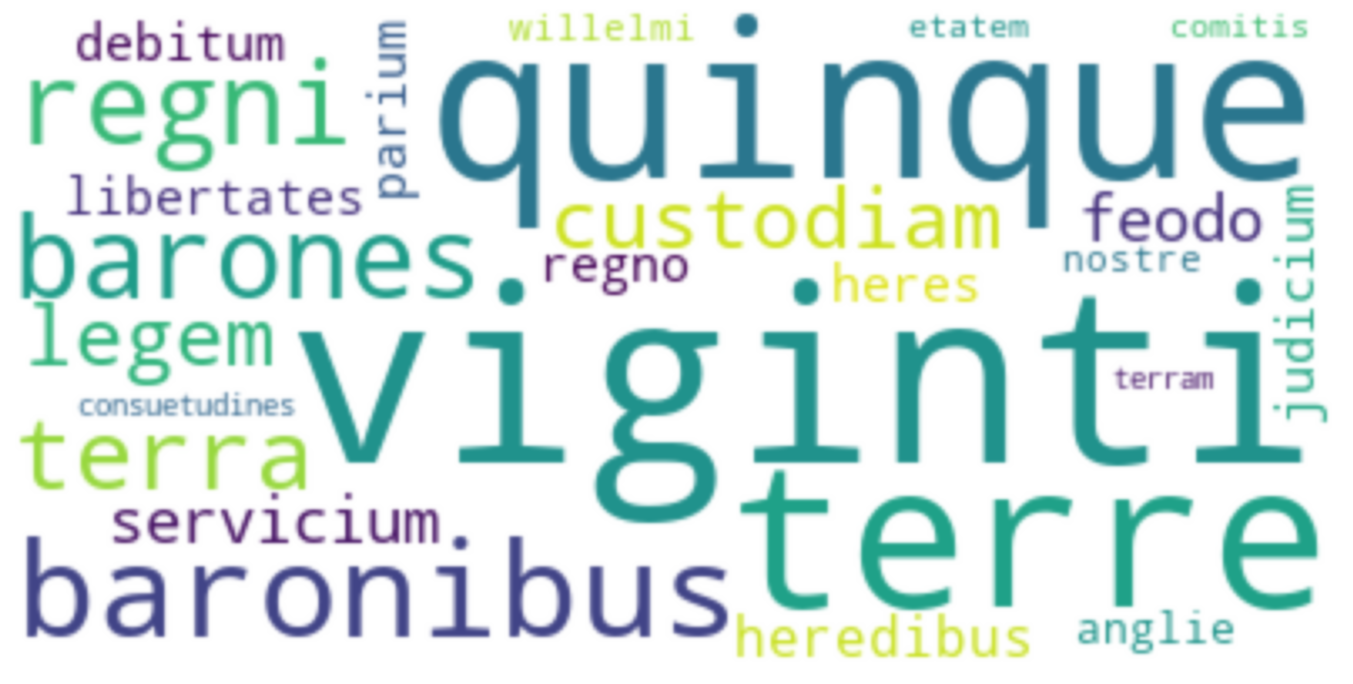

In [ ]:
plt.rcParams['figure.figsize'] = [24, 48]

form_cloud = WordCloud(
    background_color='white',
    margin=5,
    max_words=25
)

form_cloud.generate_from_frequencies(form_frequencies)

plt.imshow(form_cloud, interpolation='gaussian')
plt.axis('off')
plt.show()